<a href="https://colab.research.google.com/github/Izhankhan99k/mlrevision/blob/main/Ann_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")
path

'/kaggle/input/credit-card-customer-churn-prediction'

In [80]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [82]:
df_encoded=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=False)
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [83]:
X=df_encoded.drop(columns=["Exited"])
y=df_encoded["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [84]:
x_train_scaled=scale.fit_transform(X_train)
x_test_scaled=scale.fit_transform(X_test)

In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [106]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=13))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(loss="binary_crossentropy",optimizer='Adam',metrics=['accuracy'])

In [115]:
history=model.fit(x_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7871 - loss: 0.4775 - val_accuracy: 0.7987 - val_loss: 0.4572
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7914 - loss: 0.4666 - val_accuracy: 0.7987 - val_loss: 0.4518
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7910 - loss: 0.4614 - val_accuracy: 0.7987 - val_loss: 0.4470
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7936 - loss: 0.4517 - val_accuracy: 0.7987 - val_loss: 0.4430
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7880 - loss: 0.4594 - val_accuracy: 0.7987 - val_loss: 0.4395
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7883 - loss: 0.4495 - val_accuracy: 0.7987 - val_loss: 0.4362
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7929 - loss: 0.4438 - val_accuracy: 0.7987 - val_loss: 0.4336
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7952 - loss: 0.4351 - val_accuracy: 0.

In [116]:
model.layers[0].get_weights()

[array([[ 0.0406075 ,  0.07785317, -0.3503814 ],
        [-2.3198452 ,  2.2925286 ,  1.7325772 ],
        [ 0.27905455,  0.20229045,  0.02243366],
        [-0.43209168,  0.21033664, -0.0353873 ],
        [-0.1688052 ,  0.18449436, -1.3761766 ],
        [ 0.22356108,  0.03795473,  0.31440076],
        [ 0.6237023 , -0.46353677, -0.9531581 ],
        [-0.09279197,  0.13354357, -0.06225363],
        [ 0.44948027, -0.03944719, -0.5786544 ],
        [-0.38472843,  0.39620632,  0.46307284],
        [ 0.338603  , -0.19227675, -0.16618022],
        [-0.00823632,  0.22024998,  0.23390257],
        [ 0.5392787 , -0.36274245, -0.31633484]], dtype=float32),
 array([ 0.33243704, -0.38846746, -1.0412928 ], dtype=float32)]

In [117]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [118]:
y_pred=np.where(y_log>0.5,1,0)

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

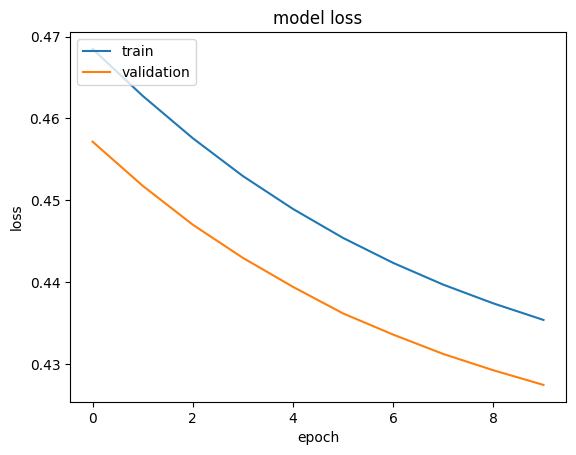

In [122]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()